In [1]:
## Loading functions
import os
os.chdir("/data/biocomp/bahin/qPCR/qPCRquantification/")
import HiFit_pd
from HiFit_pd import *

In [8]:
import importlib
importlib.reload(HiFit_pd)

<module 'HiFit_pd' from '/import/dt_biocomp/bahin/qPCR/qPCRquantification/HiFit_pd.py'>

In [3]:
import plot_physical_heatmap
from plot_physical_heatmap import *

In [2]:
cycles_col = ["F" + str(i).zfill(2) for i in range(40)]
cycles_col_norm = ["F" + str(i).zfill(2) + "_norm" for i in range(40)]
cycles_col_mod = ["F" + str(i).zfill(2) + "_mod" for i in range(40)]
cycles_col_mod_Gwb = ["F" + str(i).zfill(2) + "_mod_Gompertz_with_bump" for i in range(40)]
cycles_col_mod_GwbfE = ["F" + str(i).zfill(2) + "_mod_fixed_E_Gompertz_with_bump" for i in range(40)]

In [5]:
## Loading data
dir = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/"
data = pd.read_csv(dir + "final_data.Gompertz_with_bump.REF.tsv", sep="\t", index_col=0)

In [6]:
## Creating N0 theoretical physical heatmap
# Creating N0 plate
N0_plate = create_N0_plate(data, N0_file)
# Creating the heatmap
plot_physical_heatmap(data, N0_plate, "Theoretical N0 (log10)", "theoretical_N0_log.physical_heatmap.png", "RdYlBu_r", -6, 12)

TypeError: plot_physical_heatmap() takes 6 positional arguments but 7 were given

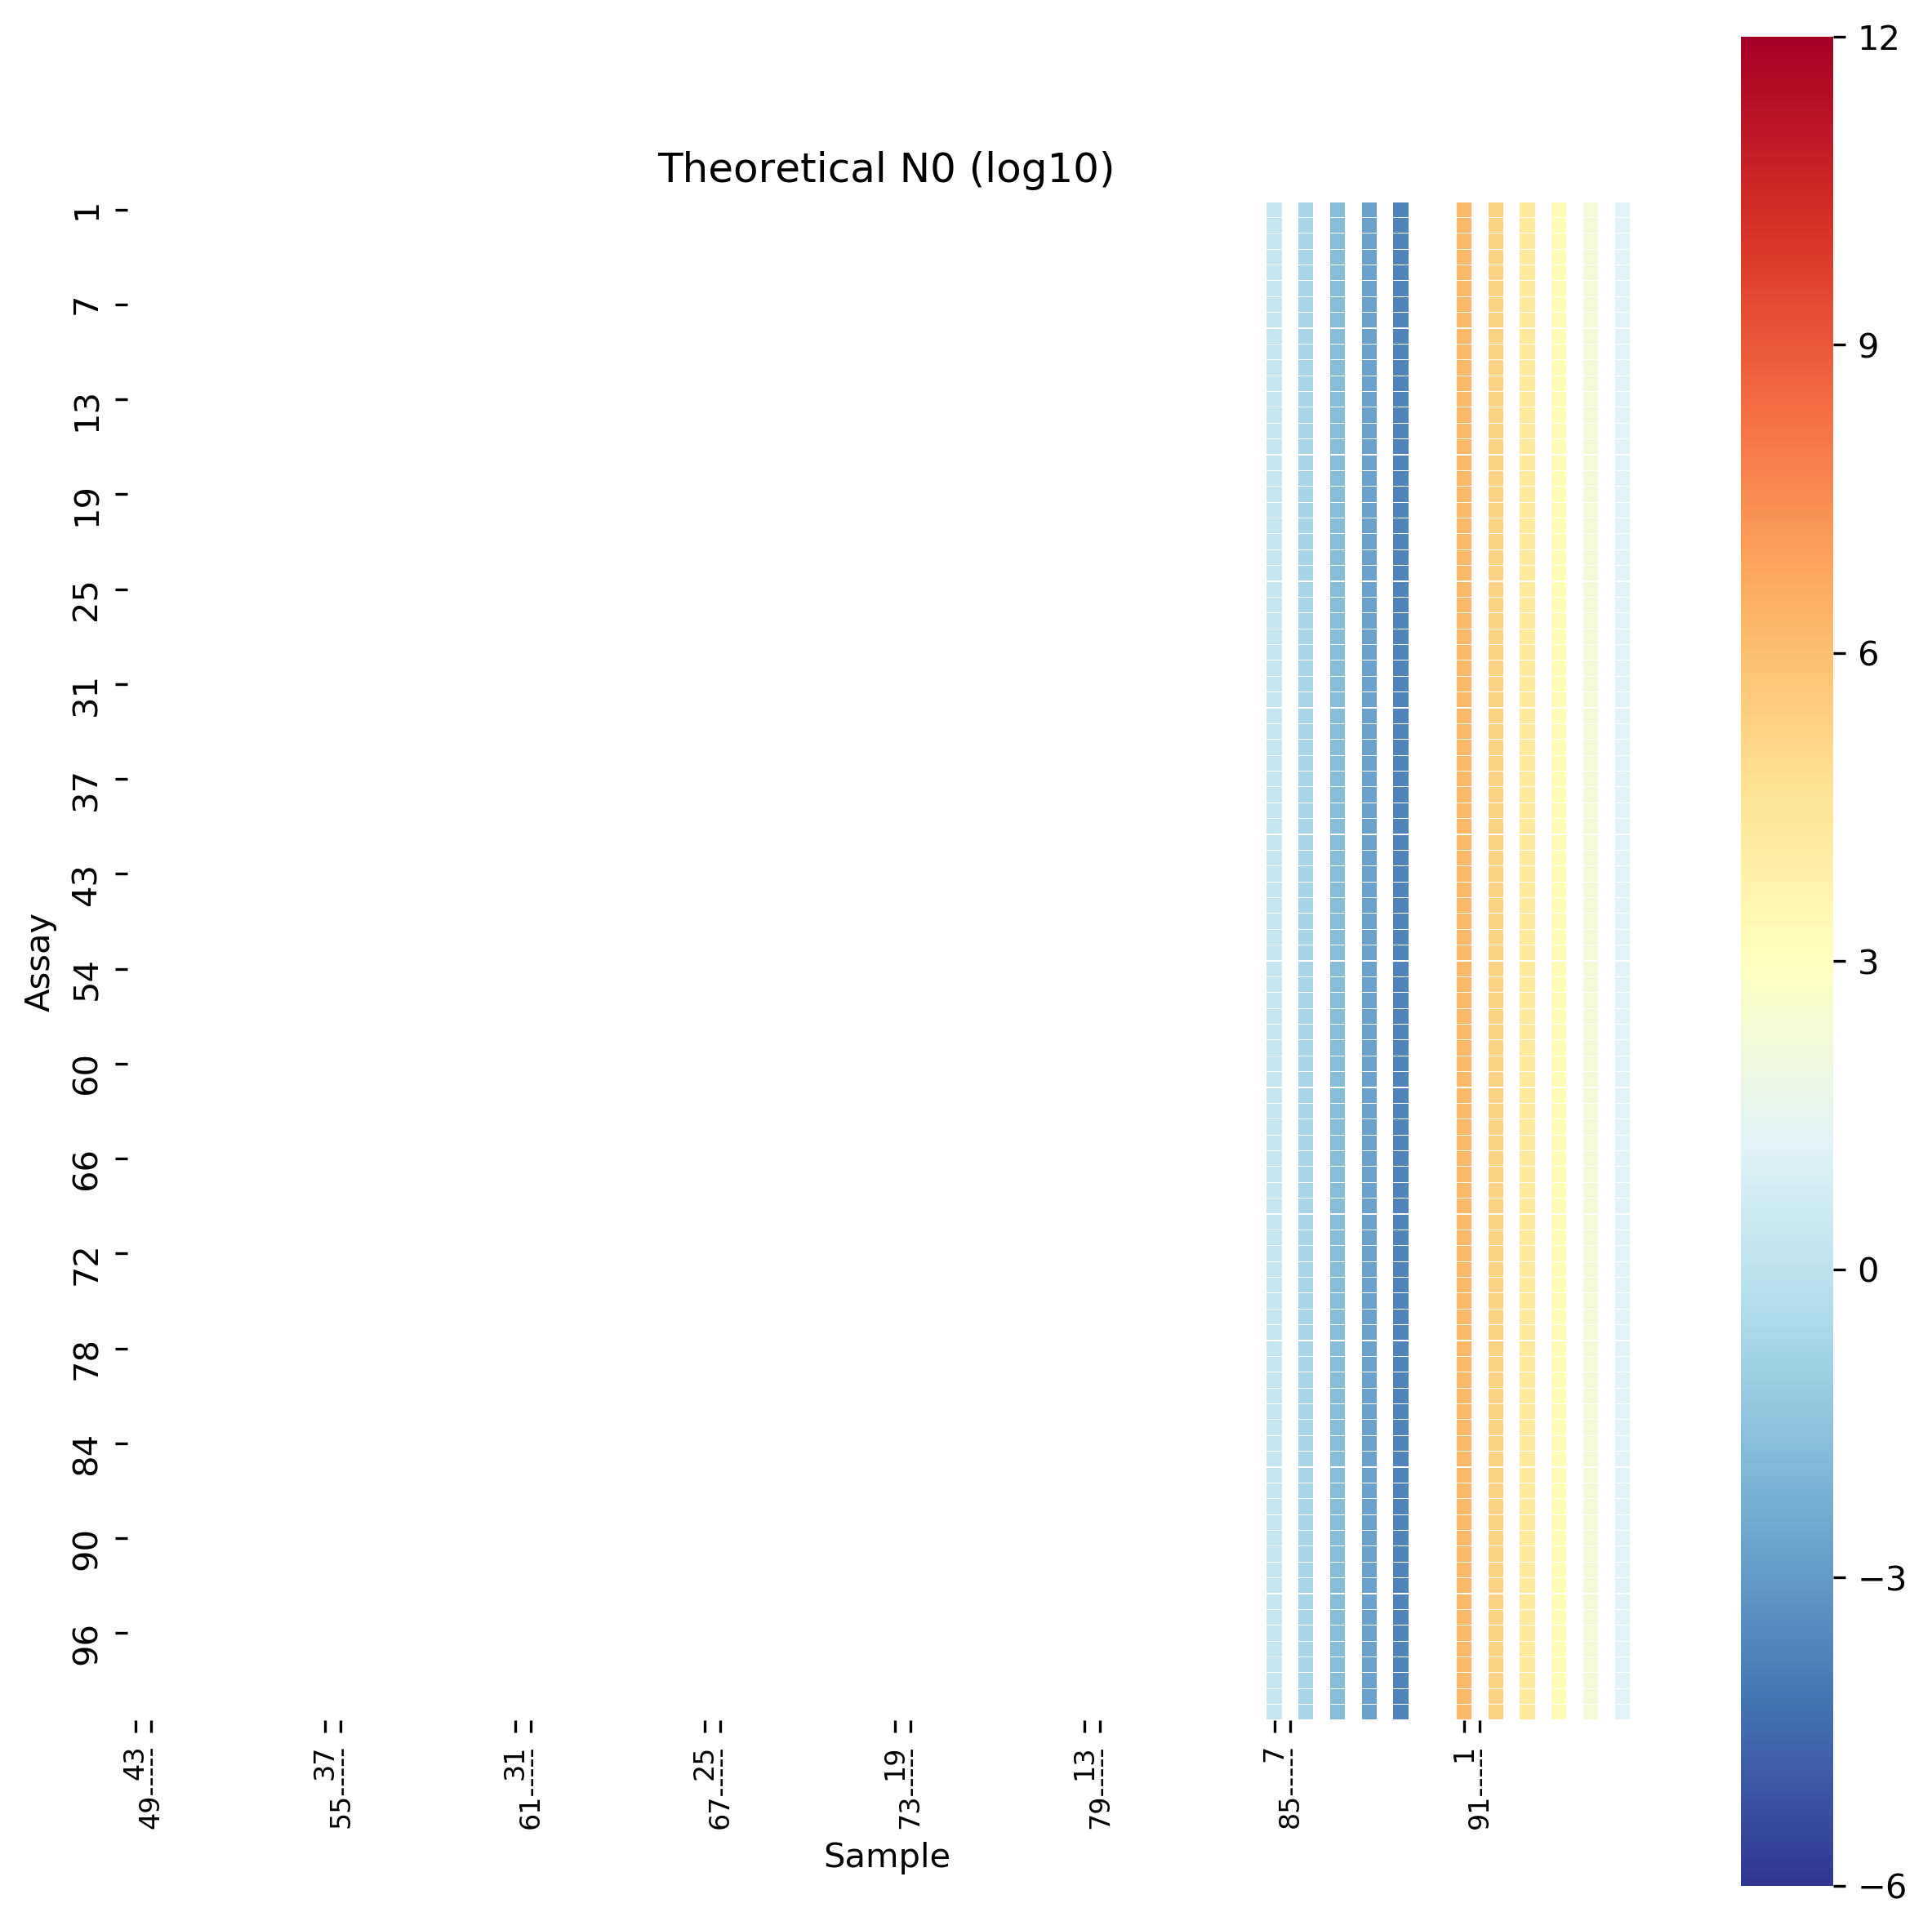

In [29]:
## Creating N0 theoretical physical heatmap only for PS not preamplified samples

# Creating N0 DataFrame
N0_df = create_N0_df(N0_file)
# Filtering out PC and pre-amplified samples
N0_df.loc[(N0_df["S_or_C"] == "PC") | (N0_df["Pre_amplification"] != 0), ["Theoretical_N0", "Theoretical_N0_log"]] = np.nan
# Creating the N0 physical plate DataFrame
N0_plate = N0_df.merge(data[["Condition", "Gene", "Sample", "Assay"]], on=["Condition", "Gene"])[["Sample", "Assay", "Theoretical_N0_log"]]
N0_plate = N0_plate.pivot(index="Assay", columns="Sample", values="Theoretical_N0_log")
# Creating the heatmap
plot_physical_heatmap(data, N0_plate, "Theoretical N0 (log10)", "theoretical_N0_log.physical_heatmap.png", "RdYlBu_r", -6, 12)

/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


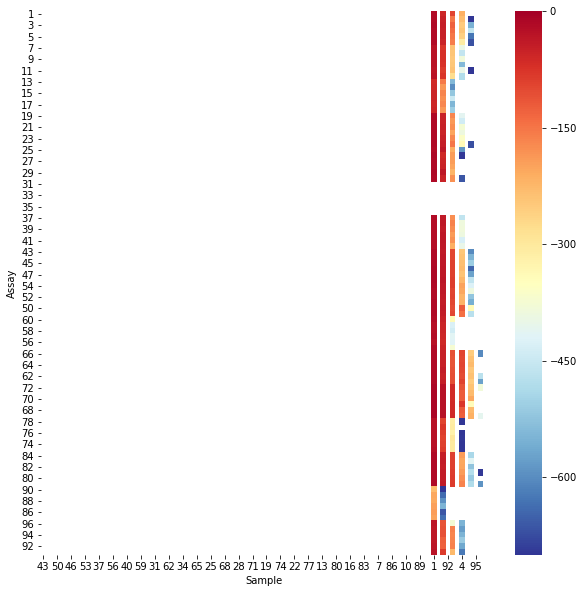

In [66]:
## Creating a DataFrame of the last fluo values as it is on the chip 2.0

# Getting only the sample, the assay and the value
val = "F00_mod_Gompertz_with_bump"
dataset = data.copy()
#dataset.loc[dataset["Sigmoid_curve"] == False, "F00_mod_Gompertz_with_bump"] = np.nan
dataset.loc[(dataset["Sigmoid_curve"] == False) | (dataset["S_or_C"] == "PC") | (dataset["Pre_amplification"] != 0), "F00_mod_Gompertz_with_bump"] = np.nan
dataset = dataset.loc[:, ["Sample", "Assay", val]]
dataset.loc[:, "F00_mod_Gompertz_with_bump_log"] = np.log(dataset["F00_mod_Gompertz_with_bump"])
# Pivoting the data so that it's a 96*96 matrix
df = dataset.pivot(index="Assay", columns="Sample", values=val + "_log")
#display(df)

# Creating the physical order assay and sample lists
assay_IDs = [x for x in range(1, 49)] + [y for x in range(48, 91, 6) for y in range(x+6, x, -1)]
sample_IDs = [None] * 96
sample_IDs[::2] = [y for x in range(43, 0, -6) for y in range(x, x+6)]
sample_IDs[1::2] = [x for x in range(49, 97)]

# Reordering the matrix
reordered_data = df[sample_IDs].reindex(assay_IDs)
#display(reordered_data.head(6))

# Displaying the heatmap
plt.figure(figsize=(10, 10))
#sns.heatmap(reordered_data, vmax=0.001)
sns.heatmap(reordered_data, cmap="RdYlBu_r", vmin=-700, vmax=0)